In [1]:
from train_RNA_ResNet import ResNet
from Calibration_Util import FileIO as io
import os

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
rnaNet = ResNet()

source_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + source_file)
target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + target_file)

rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [3]:
print(rnaNet.source[0:4, 0:2])
print(rnaNet.target[0:4, 0:2])
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))

[[-1047.59361381   -69.12575067]
 [ -999.46290114   -48.39665354]
 [-1044.10734269   -78.82105825]
 [-1060.32625385   -69.96689896]]
[[-1063.88655395   -92.71360174]
 [-1016.55539065   -76.95176009]
 [-1064.02777643   -84.89484393]
 [-1037.38639806   -88.54170399]]

gtex = source shape = (636, 20)
tcga = target shape = (211, 20)


In [4]:
rnaNet.init_res_net()

setting scales using KNN
[25.359884989452834, 50.719769978905667, 101.43953995781133]
setting all scale weights to 1
(636, 20)


In [5]:
rnaNet.train(epochs=100)

Train on 572 samples, validate on 64 samples
Epoch 1/100
572/572 [==============================] - 1s 1ms/step - loss: 1.3429 - val_loss: 1.8972
Epoch 2/100
572/572 [==============================] - 0s 496us/step - loss: 1.3502 - val_loss: 1.8978
Epoch 3/100
572/572 [==============================] - 0s 497us/step - loss: 1.3431 - val_loss: 1.8981
Epoch 4/100
572/572 [==============================] - 0s 503us/step - loss: 1.3443 - val_loss: 1.8985
Epoch 5/100
572/572 [==============================] - 0s 505us/step - loss: 1.3398 - val_loss: 1.8985
Epoch 6/100
572/572 [==============================] - 0s 502us/step - loss: 1.3421 - val_loss: 1.8991
Epoch 7/100
572/572 [==============================] - 0s 502us/step - loss: 1.3451 - val_loss: 1.8991
Epoch 8/100
572/572 [==============================] - 0s 507us/step - loss: 1.3398 - val_loss: 1.8991
Epoch 9/100
572/572 [==============================] - 0s 503us/step - loss: 1.3427 - val_loss: 1.8991
Epoch 10/100
572/572 [========

572/572 [==============================] - 0s 507us/step - loss: 1.1993 - val_loss: 1.7692
Epoch 80/100
572/572 [==============================] - 0s 518us/step - loss: 1.2017 - val_loss: 1.7617
Epoch 81/100
572/572 [==============================] - 0s 519us/step - loss: 1.1965 - val_loss: 1.7619
Epoch 82/100
572/572 [==============================] - 0s 509us/step - loss: 1.2018 - val_loss: 1.7533
Epoch 83/100
572/572 [==============================] - 0s 501us/step - loss: 1.2005 - val_loss: 1.7522
Epoch 84/100
572/572 [==============================] - 0s 505us/step - loss: 1.1953 - val_loss: 1.7576
Epoch 85/100
572/572 [==============================] - 0s 504us/step - loss: 1.1988 - val_loss: 1.7565
Epoch 86/100
572/572 [==============================] - 0s 507us/step - loss: 1.2003 - val_loss: 1.7549
Epoch 87/100
572/572 [==============================] - 0s 503us/step - loss: 1.1920 - val_loss: 1.7492
Epoch 88/100
572/572 [==============================] - 0s 505us/step - loss:

In [6]:
rnaNet.pca()

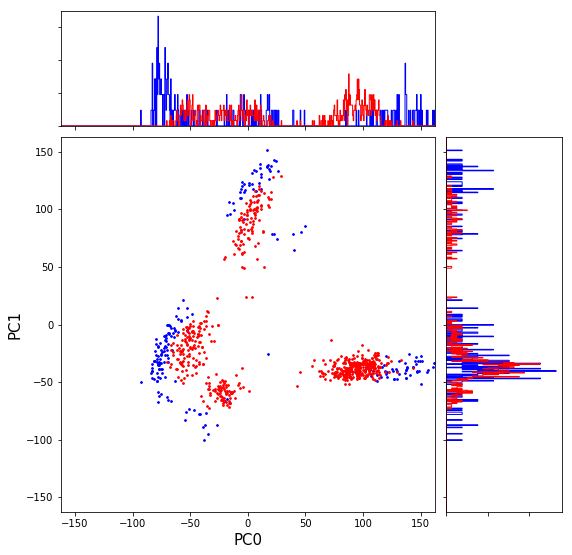

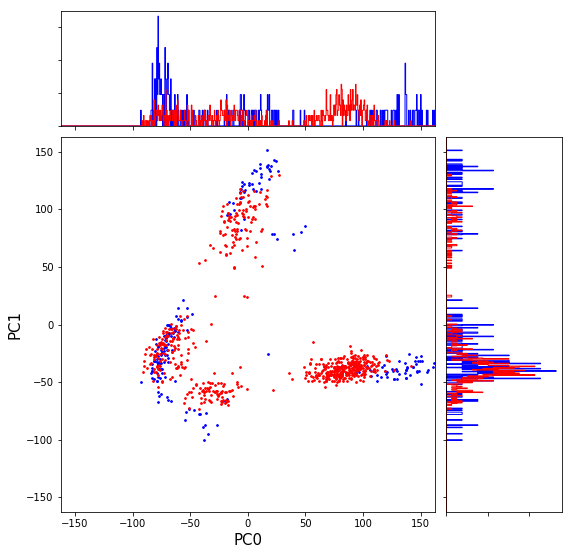

In [7]:
%matplotlib inline

rnaNet.scatter_hist()

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

def multiScatterHist(x1, x2, y1, y2, colors1, colors2, axis1='', axis2=''):
    nullfmt = NullFormatter()         # no labels
    
    # sanity check
    print("colors1 shape = " + str(colors1.shape) + " colors2 shape = " + str(colors2.shape))
    print("x1 shape = " + str(x1.shape) + " x2 shape = " + str(x2.shape))
    print("y1 shape = " + str(y1.shape) + " y2 shape = " + str(y2.shape))
    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]
    
    # start with a rectangular Figure
    plt.figure(figsize=(12, 12))
       
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    
    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)
    
    # the scatter plot:
    axScatter.scatter(x1, x2, color=colors1, marker='o', s=20)
    axScatter.scatter(y1, y2, color=colors2, marker='s', facecolors='none', s=20) 


    # now determine nice limits by hand:
    binwidth = 0.5
    xymax = np.max([np.max(np.fabs(x1)), np.max(np.fabs(x2))]) + 10
    lim = (int(xymax/binwidth) + 1) * binwidth
    
    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))
    
    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x1, bins=bins, color = 'blue', normed=True, stacked = True, histtype='step' )
    axHisty.hist(x2, bins=bins, orientation='horizontal', color = 'blue', normed=True, 
                 stacked = True, histtype='step')
    axHistx.hist(y1, bins=bins, color = 'red', normed=True, stacked = True, histtype='step')
    axHisty.hist(y2, bins=bins, orientation='horizontal', color = 'red', normed=True, 
                 stacked = True, histtype='step')
    
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    
    axHistx.set_xticklabels([])
    axHistx.set_yticklabels([])
    axHisty.set_xticklabels([])
    axHisty.set_yticklabels([])
    axScatter.set_xlabel(axis1, fontsize=15)
    axScatter.set_ylabel(axis2, fontsize=15)

    plt.show()